# A Simple Example of Adjoint Sensitivity Analysis

Han Gao (hgao1@nd.edu)

In [1]:
## import all needed Python libraries here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Here we give a very simple example of adjoint sensitivity analysis (SA) with analytic solution.

Consider a system $$Q=\int_0^{t=1}u(t)dt$$
$$s.t.\;\dot{u}=bu$$
$$\quad\quad u(0)=a$$
We want to find the $\frac{\partial Q}{\partial a}$ and $\frac{\partial Q}{\partial b}$ by SA.


In [2]:
"""define hyperparameters of the problem"""
ts=0 # Start Time
te=1 # End Time
"""define the time domain of the problem"""
T=np.linspace(ts,te,1000)
"""define the QOI function """
qoi=lambda a,b:a/b*(np.exp(b*te)-1)

Itergrate the system we can get
$$u(t)=a\cdot e^{bt}$$


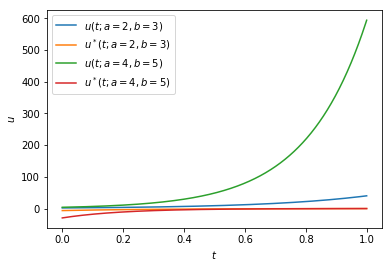

In [3]:
"""define the primary solution"""
fu=lambda t,a,b: a*np.exp(b*t)
"""define the adjoint solution"""
fua=lambda t,a,b:1/b*(1-np.exp(b*(te-t)))
"""plot the solutions"""
plt.figure()
plt.plot(T,fu(T,2,3),label=r'$u(t;a=2,b=3)$')
plt.plot(T,fua(T,2,3),label=r'$u^*(t;a=2,b=3)$')
plt.plot(T,fu(T,4,5),label=r'$u(t;a=4,b=5)$')
plt.plot(T,fua(T,4,5),label=r'$u^*(t;a=4,b=5)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$u$')
plt.legend()

We also need to eliminate costly terms related to all the derivatives of primary variable w.r.t paramters and time by choosing appropriate Lagrange multipliers, we let
$$1-bu^*-\dot{u^*}=0\quad\dot{u^*}(1)=0$$
and we integrate it backward from $t=1$
$$u^*(t)=b^{-1}(1-e^{b(1-t)})$$

And we recall the formula of SA to get the derivative
$$\frac{\partial Q}{\partial \theta}=\int_0^1(x+u^*\frac{\partial F}{\partial \theta})dt+u^*\frac{\partial F}{\partial \dot{u}}|_{t=0}+\frac{\partial (F_0)^{-1}}{\partial u(0)}\frac{\partial F_0}{\partial \theta}$$
We substitue the $\theta=[a,b]$ and $u^*$ we get
$$\frac{\partial Q}{\partial a}=\frac{1}{b}(e^{b}-1)$$
and
$$\frac{\partial Q}{\partial b}=\frac{a}{b}e^{b}-\frac{a}{b^2}(e^{b}-1)$$

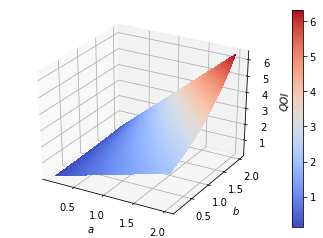

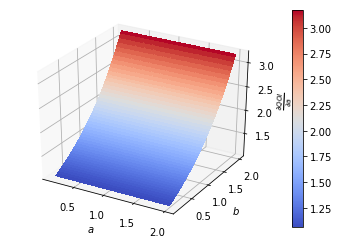

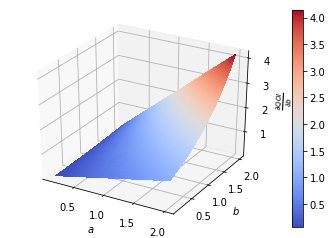

In [4]:
dqoida=lambda a,b:1/b*(np.exp(b*te)-1)
dqoidb=lambda a,b:a/b*te*np.exp(b*te)-a/b**2*(np.exp(b*te)-1)

"""plot the QOI"""
A,B=np.meshgrid(np.linspace(0.1,2,100),np.linspace(0.1,2,100))
QOI=np.reshape(qoi(A.flatten(),B.flatten()),A.shape)
DQOIDA=np.reshape(dqoida(A.flatten(),B.flatten()),A.shape)
DQOIDB=np.reshape(dqoidb(A.flatten(),B.flatten()),A.shape)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A, B, QOI, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')
ax.set_zlabel(r'$QOI$')
fig.colorbar(surf)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A, B, DQOIDA, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')
ax.set_zlabel(r'$\frac{\partial QOI}{\partial a}$')
fig.colorbar(surf)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A, B, DQOIDB, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')
ax.set_zlabel(r'$\frac{\partial QOI}{\partial b}$')
fig.colorbar(surf)